In [1]:
import netCDF4 as nc
import numpy as np

#fft_path = '/home/jim/Desktop/FFT_notebook/BPMFwFFT/examples/fft_sampling/t4_benzene'
fft_path = '/home/jim/Desktop/FFT_notebook/5.fft_sampling/1AVZ_B:C_2'
fft_sample_nc = '%s/fft_sample.nc'%fft_path

variable_names = nc.Dataset(fft_sample_nc, 'r').variables
rec_positions = nc.Dataset(fft_sample_nc, 'r').variables["rec_positions"][:]
lig_positions = nc.Dataset(fft_sample_nc, 'r').variables["lig_positions"][:]
lig_com = nc.Dataset(fft_sample_nc, 'r').variables["lig_com"][:]
volume = nc.Dataset(fft_sample_nc, 'r').variables["volume"][:]
nr_grid_points = nc.Dataset(fft_sample_nc, 'r').variables["nr_grid_points"][:]
exponential_sums = nc.Dataset(fft_sample_nc, 'r').variables["exponential_sums"][:]
log_of_divisors = nc.Dataset(fft_sample_nc, 'r').variables["log_of_divisors"][:]

mean_energy = nc.Dataset(fft_sample_nc, 'r').variables["mean_energy"][:]
min_energy = nc.Dataset(fft_sample_nc, 'r').variables["min_energy"][:]
resampled_energies = nc.Dataset(fft_sample_nc, 'r').variables["resampled_energies"][:]
resampled_trans_vectors = nc.Dataset(fft_sample_nc, 'r').variables["resampled_trans_vectors"][:]
print(resampled_trans_vectors[:])
print(resampled_energies[:])

#grid coordinates
origin = nc.Dataset(fft_sample_nc, 'r').variables["origin"][:]
x = nc.Dataset(fft_sample_nc, 'r').variables["x"][:]
y = nc.Dataset(fft_sample_nc, 'r').variables["y"][:]
z = nc.Dataset(fft_sample_nc, 'r').variables["z"][:]
d = nc.Dataset(fft_sample_nc, 'r').variables["d1"][:]
#print('native pose:', str(resampled_trans_vectors[0][0]))
#print('native pose:', resampled_energies[0][0])

#print('test', np.where(resampled_energies ==-1412.9091438865273))
#print('min energy pose:', resampled_trans_vectors[120][0])
#print('min energy pose:', resampled_energies[120][0])

for name in variable_names:
    print(name)

# for i, vec in enumerate(lig_com):
#     adj_vec = []
#     for x in vec:
#         adj_vec.append(x/0.5)
#     print('lig_com:%s'%i, vec, adj_vec)

# for i, vec in enumerate(resampled_trans_vectors[0]):
#     adj_vec = []
#     for x in vec:
#         adj_vec.append(x*0.5)
#     print('vec%s:'%i, str(adj_vec), str(vec))


print(lig_positions.shape)
print(resampled_energies.shape)
print(resampled_trans_vectors.shape)
print(np.amin(resampled_energies[0]))
min_index = np.where(resampled_energies[0] == resampled_energies[0].min())
print(min_index)
print(float(resampled_energies[0][min_index]))
print(resampled_trans_vectors[0][min_index])

[[[ 90  81  42]
  [ 90  80  42]
  [ 90  79  42]
  ...
  [133  25  14]
  [137  27  13]
  [135  28  11]]]
[[-290.5134744  -285.69731967 -278.72904052 -278.46354842 -270.99229507
  -271.824445   -270.20095729 -268.40182454 -266.50521516 -263.76236333
  -262.78809996 -260.78256302 -258.2053178  -258.13407105 -257.70172335
  -256.41307171 -254.94790373 -256.05968109 -255.62840902 -254.18455762
  -254.47072234 -253.73858723 -254.61865316 -253.65340421 -254.19585413
  -253.54265324 -252.79392521 -252.29762463 -253.29791994 -252.45786748
  -252.34197886 -252.23886523 -252.1737957  -250.95516821 -251.53473518
  -250.41975413 -248.4625774  -250.78181244 -250.49548913 -250.97178073
  -250.61215092 -250.96259767 -250.90190606 -249.67195558 -249.4923852
  -249.82226812 -248.71200437 -249.2583227  -248.56186589 -248.27805106
  -249.22817805 -246.83712377 -248.77068688 -247.5684656  -247.87108343
  -248.40998324 -248.70652555 -246.29693779 -246.91580935 -247.91298215
  -247.7071708  -246.92327812 -24

In [2]:
import netCDF4 as nc
import numpy as np

grid_path = '/home/jim/Desktop/FFT_notebook/4.receptor_grid/1AVZ_B:C_2'
grid_nc = '%s/grid.nc'%grid_path


#parsing some of the netcdf variables from grid.nc
grid_variables = nc.Dataset(grid_nc, 'r').variables
counts = nc.Dataset(grid_nc, 'r').variables["counts"][:]
x = nc.Dataset(grid_nc, 'r').variables["x"][:]
y = nc.Dataset(grid_nc, 'r').variables["y"][:]
z = nc.Dataset(grid_nc, 'r').variables["z"][:]
electrostatic = nc.Dataset(grid_nc, 'r').variables["electrostatic"][:]
lja = nc.Dataset(grid_nc, 'r').variables["LJa"][:]
ljr = nc.Dataset(grid_nc, 'r').variables["LJr"][:]
occupancy = nc.Dataset(grid_nc, 'r').variables["occupancy"][:]
trans_crd = nc.Dataset(grid_nc, 'r').variables["trans_crd"][:]

#DELETE ME: print statements for inspecting the contents of grid.nc
#print(len(occupancy[200][:]))
#print(grid_variables)
kttc = []
for key in grid_variables:
    kttc.append(key)
#    print(grid_variables[key])
print(kttc)
print(counts)
#electrostatic grid is accessed by grid[x][y][z], to be confirmed. Alternative is grid[z][y][x]
#below code accesses electrostatic grid values for 3 points on the same axis
print(electrostatic[0][0][0],electrostatic[0][0][1],electrostatic[0][0][2])
#identifies occupied positions on the grid 
occupied_list = [i for i in range(len(occupancy[50][50])) if occupancy[50][50][i] == 1] 
          
# printing resultant list  
print ("New indices list : " + str(occupied_list)) 

#for i in res_list:
#    print(electrostatic[200][200][i])
    
#print(trans_crd)
#print(trans_crd[:])

def multiply_grids(electrostatic_grid, lja_grid, ljr_grid, occupancy_grid):
    grid_dot = np.empty((electrostatic_grid.shape[0], electrostatic_grid.shape[1], electrostatic_grid.shape[2]))
    for i in range(electrostatic_grid.shape[0]):
        for j in range(electrostatic_grid.shape[1]):
            for k in range(electrostatic_grid.shape[2]):
                grid_dot[i][j][k] = np.dot(electrostatic_grid[i][j][k], lja_grid[i][j][k])
                grid_dot[i][j][k] = np.dot(grid_dot[i][j][k], ljr_grid[i][j][k])
    return grid_dot

def get_meaningful_energies(energies):
    for i in range(energies.shape[0]):
        for j in range(energies.shape[1]):
            for k in range(energies.shape[2]):
                if energies[i][j][k] > 0.5:
                    print(energies[i][j][k])


#result = multiply_grids(electrostatic, lja, ljr, occupancy)
#get_meaningful_energies(result)
#print(result)
for i in trans_crd:
    if i[0] > 140:
        print(i)
    
native_trans = [i for i in range(len(trans_crd[:])) if trans_crd[i][0] == 140] 
print(len(trans_crd))
for point in occupied_list:
    print(trans_crd[point])
# get the center of mass of the crystallographic pose, then, get the center of mass for every
# translation of the native rotation and measure the distance between the two points. Select
# the translation with the nearest center of mass as the "native/crystallographic pose"



['lj_sigma_scaling_factor', 'origin', 'd0', 'd1', 'd2', 'spacing', 'counts', 'x', 'y', 'z', 'electrostatic', 'LJr', 'LJa', 'occupancy', 'trans_crd']
[491 491 491]
4.415608912995722 4.4210847196565535 4.426541532411576
New indices list : []
1839


In [3]:
# Create the receptor and ligand grid objects by loading an existing grid calculation result

from grids import RecGrid
from grids import LigGrid

rec_prmtop = "/home/jim/Desktop/FFT_notebook/1.amber/1AVZ_B:C_2/receptor.prmtop"
lj_sigma_scal_fact = 0.8
rec_inpcrd = "/home/jim/Desktop/FFT_notebook/2.minimize/1AVZ_B:C_2/receptor.inpcrd"

bsite_file = None
grid_nc_file = "/home/jim/Desktop/FFT_notebook/4.receptor_grid/1AVZ_B:C_2/grid.nc"

lig_prmtop = "/home/jim/Desktop/FFT_notebook/1.amber/1AVZ_B:C_2/ligand.prmtop"
lig_inpcrd = "/home/jim/Desktop/FFT_notebook/2.minimize/1AVZ_B:C_2/ligand.inpcrd"



def _create_rec_grid(rec_prmtop, lj_sigma_scal_fact, rec_inpcrd, bsite_file, grid_nc_file):
    rec_grid = RecGrid(rec_prmtop, lj_sigma_scal_fact, rec_inpcrd, bsite_file, 
                        grid_nc_file, new_calculation=False)
    return rec_grid

def _create_lig_grid(lig_prmtop, lj_sigma_scal_fact, lig_inpcrd, rec_grid):
    lig_grid = LigGrid(lig_prmtop, lj_sigma_scal_fact, lig_inpcrd, rec_grid)
    return lig_grid

rec_grid = _create_rec_grid(rec_prmtop, lj_sigma_scal_fact, rec_inpcrd, bsite_file, grid_nc_file)

lig_grid = _create_lig_grid(lig_prmtop, lj_sigma_scal_fact, lig_inpcrd, rec_grid)



    

[0.8]
/home/jim/Desktop/FFT_notebook/4.receptor_grid/1AVZ_B:C_2/grid.nc
[  0.     0.25   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25
   2.5    2.75   3.     3.25   3.5    3.75   4.     4.25   4.5    4.75
   5.     5.25   5.5    5.75   6.     6.25   6.5    6.75   7.     7.25
   7.5    7.75   8.     8.25   8.5    8.75   9.     9.25   9.5    9.75
  10.    10.25  10.5   10.75  11.    11.25  11.5   11.75  12.    12.25
  12.5   12.75  13.    13.25  13.5   13.75  14.    14.25  14.5   14.75
  15.    15.25  15.5   15.75  16.    16.25  16.5   16.75  17.    17.25
  17.5   17.75  18.    18.25  18.5   18.75  19.    19.25  19.5   19.75
  20.    20.25  20.5   20.75  21.    21.25  21.5   21.75  22.    22.25
  22.5   22.75  23.    23.25  23.5   23.75  24.    24.25  24.5   24.75
  25.    25.25  25.5   25.75  26.    26.25  26.5   26.75  27.    27.25
  27.5   27.75  28.    28.25  28.5   28.75  29.    29.25  29.5   29.75
  30.    30.25  30.5   30.75  31.    31.25  31.5   31.75  32.    32.25
  32.

Doing FFT for electrostatic
Doing FFT for LJr
Doing FFT for LJa
Doing FFT for occupancy
Copy entries from receptor_grid ['lj_sigma_scaling_factor', 'x', 'y', 'z', 'd0', 'd1', 'd2', 'spacing', 'counts', 'origin']
[0.8]
[  0.     0.25   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25
   2.5    2.75   3.     3.25   3.5    3.75   4.     4.25   4.5    4.75
   5.     5.25   5.5    5.75   6.     6.25   6.5    6.75   7.     7.25
   7.5    7.75   8.     8.25   8.5    8.75   9.     9.25   9.5    9.75
  10.    10.25  10.5   10.75  11.    11.25  11.5   11.75  12.    12.25
  12.5   12.75  13.    13.25  13.5   13.75  14.    14.25  14.5   14.75
  15.    15.25  15.5   15.75  16.    16.25  16.5   16.75  17.    17.25
  17.5   17.75  18.    18.25  18.5   18.75  19.    19.25  19.5   19.75
  20.    20.25  20.5   20.75  21.    21.25  21.5   21.75  22.    22.25
  22.5   22.75  23.    23.25  23.5   23.75  24.    24.25  24.5   24.75
  25.    25.25  25.5   25.75  26.    26.25  26.5   26.75  27.    27.25
 

In [5]:
spacing = 0.5
lower_ligand_corner = np.array([lig_grid.get_crd()[:,i].min() for i in range(3)], dtype=float) - 1.5*(0.25)

upper_ligand_corner = np.array([lig_grid.get_crd()[:,i].max() for i in range(3)], dtype=float) + 1.5*(0.25)

min_crd = [lig_grid.get_crd()[:,i].min() for i in range(3)]
max_crd = [lig_grid.get_crd()[:,i].max() for i in range(3)]
print("\nlower_ligand_corner", lower_ligand_corner, 
      "\nupper_ligand_corner", upper_ligand_corner,
      "\nmin_coordinate", min_crd,
      "\nmax_coordinate", max_crd
     )
ligand_box_lengths = upper_ligand_corner - lower_ligand_corner
coordinate_lengths = np.array(max_crd) - np.array(min_crd)
print(ligand_box_lengths, coordinate_lengths)

lower_ligand_corner_grid_aligned = lower_ligand_corner - (spacing + lower_ligand_corner % spacing)
upper_ligand_corner_grid_aligned = upper_ligand_corner + (spacing - upper_ligand_corner % spacing)

grid_aligned_ligand_box_lengths = upper_ligand_corner_grid_aligned - lower_ligand_corner_grid_aligned

max_grid_indices = np.ceil(ligand_box_lengths / spacing)
max_grid_indices_aligned = np.ceil(grid_aligned_ligand_box_lengths / spacing)

print("\nlower_ligand_corner_grid_aligned", lower_ligand_corner_grid_aligned, 
      "\nupper_ligand_corner_grid_aligned", upper_ligand_corner_grid_aligned,
      "\nmin_coordinate", min_crd,
      "\nmax_coordinate", max_crd,
      "\ngrid_aligned_box_lengths", grid_aligned_ligand_box_lengths,
      "\nmax_grid_indicies", max_grid_indices,
      "\nmax_grid_indicies_aligned", max_grid_indices_aligned
     )


lower_ligand_corner [1.3042288 1.0734091 0.9361267] 
upper_ligand_corner [26.5753256 32.1670704 34.1205044] 
min_coordinate [1.6792288000000006, 1.4484090999999992, 1.3111267000000026] 
max_coordinate [26.2003256, 31.7920704, 33.7455044]
[25.2710968 31.0936613 33.1843777] [24.5210968 30.3436613 32.4343777]

lower_ligand_corner_grid_aligned [0.5 0.5 0. ] 
upper_ligand_corner_grid_aligned [27.  32.5 34.5] 
min_coordinate [1.6792288000000006, 1.4484090999999992, 1.3111267000000026] 
max_coordinate [26.2003256, 31.7920704, 33.7455044] 
grid_aligned_box_lengths [26.5 32.  34.5] 
max_grid_indicies [51. 63. 67.] 
max_grid_indicies_aligned [53. 64. 69.]


In [5]:
print(len(lig_grid.get_charges()['CHARGE_E_UNIT']))
#print(lig_grid.get_crd())
print(resampled_trans_vectors[0])
trans_lig_crd = []
for i, crd in enumerate(lig_grid.get_crd()):
    shifted_crds = []
    shifted_crds.append(crd[0]+(resampled_trans_vectors[0][0][0]*.5))
    shifted_crds.append(crd[1]+(resampled_trans_vectors[0][0][1]*.5))
    shifted_crds.append(crd[2]+(resampled_trans_vectors[0][0][2]*.5))
    trans_lig_crd.append(shifted_crds)

trans_lig_crd_array = np.array(trans_lig_crd)
print(trans_lig_crd[0])
print(lig_grid.get_crd()[0])
#print(rec_grid.direct_energy(trans_lig_crd_array, lig_grid.get_charges()))


889
[[89 80 41]
 [89 79 41]
 [89 81 40]
 ...
 [94 80 35]
 [87 75 39]
 [79 81 42]]
[63.2032261, 57.7551289, 25.715703000000005]
[18.7032261 17.7551289  5.215703 ]


In [22]:
import IO

pdb_filename = '/home/jim/Desktop/FFT_notebook/ligand_test2.pdb'

lig_prmtop = "/home/jim/Desktop/FFT_notebook/1.amber/1AVZ_B:C_2/ligand.prmtop"



IO.write_pdb(lig_prmtop, lig_grid.get_crd(), pdb_filename, "w")

IO.write_pdb(lig_prmtop, trans_lig_crd_array, '/home/jim/Desktop/FFT_notebook/ligand_test2.pdb', "w")

In [23]:
rotation_nc = '/home/jim/Desktop/FFT_notebook/3.ligand_rand_rot/1AVZ_B:C_2/rotation.nc'

rotation_variables = nc.Dataset(rotation_nc, 'r').variables["positions"]

for i, rotation in enumerate(rotation_variables):
    IO.write_pdb(lig_prmtop, rotation_variables[i], '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C_2/ligand_rotation%s.pdb'%i, "w")

print(rotation_variables.shape)
#IO.write_pdb(lig_prmtop, rotation_variables, '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C/ligand_rotation%s.pdb'%i, "w")

(2001, 889, 3)


In [24]:
# find the average translation vector between the origin centered structure and the initial translation
# this is mostly just a test, it's not needed for anything

native_translations = []

for i in range(0,889):
    native_translations.append([lig_grid.get_crd()[i][0]-rotation_variables[0][i][0], lig_grid.get_crd()[i][1]-rotation_variables[0][i][1], lig_grid.get_crd()[i][2]-rotation_variables[0][i][2]])
    #print(lig_grid.get_crd()[i][0]-rotation_variables[0][i][0], lig_grid.get_crd()[i][1]-rotation_variables[0][i][1], lig_grid.get_crd()[i][2]-rotation_variables[0][i][2])
native_trans_array = np.array(native_translations)

print(np.average(native_trans_array, axis=0))

[13.38627865 14.9664812  16.58221769]


In [25]:
# here for some reason, seems to be unused... #DELETEME
def _get_molecule_center_of_mass(self):
    """
    return the center of mass of self._crd
    """
    center_of_mass = np.zeros([3], dtype=float)
    masses = self._prmtop["MASS"]
    for atom_ind in range(len(self._crd)):
        center_of_mass += masses[atom_ind] * self._crd[atom_ind]
    total_mass = masses.sum()
    if total_mass == 0:
        raise RuntimeError("zero total mass")
    return center_of_mass / total_mass

In [3]:
print(lig_grid.get_initial_com())
print(rec_grid.get_initial_com())

[14.26474857 15.8283485  17.50423602]


AttributeError: 'RecGrid' object has no attribute 'get_initial_com'

In [12]:
IO.write_pdb(lig_prmtop, lig_positions[1], "/home/jim/Desktop/FFT_notebook/ligand_test5_rot2.pdb", "w")

In [27]:
for i, position in enumerate(lig_positions):
    IO.write_pdb(lig_prmtop, rotation_variables[i], '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C_2/ligand_positions%s.pdb'%i, "w")


In [2]:
# get list of lowest energy translations
#def get_min_energy_translations:
import IO
trans_tuples = []
for i, rotation in enumerate(resampled_energies):
    min_index = np.where(rotation == rotation.min())
    trans_tuples.append((rotation[min_index], resampled_trans_vectors[i][min_index]))

#print(trans_tuples[0][1][0][0])

trans_lig_crd = []
for i, position in enumerate(lig_positions):
    shifted_crds = []
    for j, crd in enumerate(position):
        shifted_crds.append([crd[0]+(trans_tuples[i][1][0][0]*.5), crd[1]+(trans_tuples[i][1][0][1]*.5),crd[2]+(trans_tuples[i][1][0][2]*.5)])
    shifted_array = np.array(shifted_crds)
    IO.write_pdb(lig_prmtop, shifted_array, '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C_2/lowest_energy_pose%s.pdb'%i, "w")
    
#print(trans_lig_crd)
#trans_lig_crd_array = np.array(trans_lig_crd)
    

# for i, position in resampled_energies[0]:
#     min_index = np.where(resampled_energies[0] == resampled_energies[0].min())

NameError: name 'resampled_energies' is not defined

In [4]:
# get list of lowest energy rotation for first translation
#def get_min_energy_translations:
import IO
trans_tuples = []
for i, rotation in enumerate(resampled_energies):
    min_index = np.where(rotation == rotation.min())
    trans_tuples.append((rotation[min_index], resampled_trans_vectors[i][min_index]))

#print(trans_tuples[0][1][0][0])

trans_lig_crd = []
for i, position in enumerate(lig_positions):
    shifted_crds = []
    for j, crd in enumerate(position):
        shifted_crds.append([crd[0]+(trans_tuples[i][1][0][0]*.5), crd[1]+(trans_tuples[i][1][0][1]*.5),crd[2]+(trans_tuples[i][1][0][2]*.5)])
    shifted_array = np.array(shifted_crds)
    IO.write_pdb(lig_prmtop, shifted_array, '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C_2/lowest_energy_pose%s.pdb'%i, "w")
    
#print(trans_lig_crd)
#trans_lig_crd_array = np.array(trans_lig_crd)
    

# for i, position in resampled_energies[0]:
#     min_index = np.where(resampled_energies[0] == resampled_energies[0].min())

## Print out every translation of a given rotation

In [6]:
# Translate atoms of ligand by every translation vector, sequentially.
# Then write PDB files for each translation. 
import IO
for i, vector in enumerate(resampled_trans_vectors[0][:]):
    print(vector, resampled_energies[0][i])
    
trans_lig_crd = []


# Write a single translation (default the first one) for a specified rotation
trans_vector = resampled_trans_vectors[0][0]
shifted_crds = []
for j, crd in enumerate(lig_positions[0]):
    shifted_crds.append([crd[0]+(trans_vector[0]*.5), crd[1]+(trans_vector[1]*.5),crd[2]+(trans_vector[2]*.5)])
shifted_array = np.array(shifted_crds)
IO.write_pdb(lig_prmtop, shifted_array, '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C_2/rotation0_translation0.pdb', "w")

# Write all of the translations for a given rotation (default is native rotation)
# for k, trans_vector in enumerate(resampled_trans_vectors[0][:]):
#     shifted_crds = []
#     for j, crd in enumerate(lig_positions[0]):
#         shifted_crds.append([crd[0]+(trans_vector[0]*.5), crd[1]+(trans_vector[1]*.5),crd[2]+(trans_vector[2]*.5)])
#     shifted_array = np.array(shifted_crds)
#     IO.write_pdb(lig_prmtop, shifted_array, '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C_2/rotation0_translation%s.pdb'%k, "w")
    

[90 81 42] -290.5134743960163
[90 80 42] -285.69731967230797
[90 79 42] -278.7290405182205
[88 81 41] -278.4635484202155
[87 80 41] -270.99229506716625
[89 82 41] -271.82444500283793
[89 81 41] -270.2009572864218
[90 80 41] -268.4018245413908
[89 80 41] -266.50521516452847
[88 80 41] -263.7623633339796
[90 79 41] -262.78809995901895
[89 79 41] -260.78256301575664
[88 79 41] -258.2053177986391
[91 78 41] -258.13407105096627
[134  30  13] -257.70172334809615
[136  30  14] -256.41307171323217
[89 82 40] -254.94790373350446
[90 78 41] -256.05968109064247
[91 80 40] -255.6284090158363
[87 79 41] -254.18455762179832
[120  33  20] -254.4707223381157
[119  34  20] -253.73858722729972
[120  34  18] -254.61865316122783
[89 78 41] -253.65340421221754
[137  30  14] -254.1958541280682
[89 81 40] -253.5426532405101
[90 80 40] -252.79392520523405
[88 83 40] -252.29762462696718
[133  30  12] -253.29791993897692
[88 82 40] -252.45786747748878
[122  31  17] -252.34197886082637
[135  30  13] -252.2388652

In [ ]:
import IO

print(lig_positions[0])
print(resampled_trans_vectors[0][0][0])
# write the unshifted ligand to check its initial position.  Should be at the origin somewhere.
IO.write_pdb(lig_prmtop, lig_positions[0], '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C_2/ligand_origin.pdb', "w")

In [6]:
xtal_lig_crd = []

for k, crd in enumerate(lig_positions[0]):
        xtal_lig_crd.append([crd[0]+(70.01000165), crd[1]+(15.40320635),crd[2]+(-44.85042575)])
IO.write_pdb(lig_prmtop, xtal_lig_crd, '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C_2/xtal_pose.pdb', "w")

In [31]:
import prody

from os import listdir
from os.path import isfile, join

pose_path = '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C_2/'

pose_files = [f for f in listdir(pose_path) if isfile(join(pose_path, f))]

pdb_paths = []

for file in pose_files:
    if file[-4:] == '.pdb':
        path = '%s%s'%(pose_path,file)
        pdb_paths.append(path)

native = prody.parsePDB('/home/jim/Desktop/FFT_notebook/trans_ligand_test.pdb')
rmsds = []
for index, path in enumerate(pdb_paths):
    pose = prody.parsePDB(path)
    rmsds.append(prody.calcRMSD(native, pose))

@> 889 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00

@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00

@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00

@> 889 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00

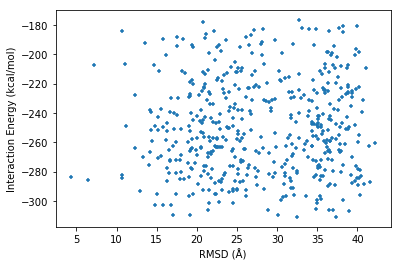

In [32]:
import netCDF4 as nc 
import matplotlib.pyplot as plt

lowest_energies = []
for energy, translation in trans_tuples:
    lowest_energies.append(energy)

# plot 1000 energies vs translations
fft_fn = '1AVZ_B:C_2'
plt.scatter(rmsds, lowest_energies, s=20, marker='+')
plt.xlabel('RMSD (Å)')
plt.ylabel('Interaction Energy (kcal/mol)')
plt.savefig('%s.png'%fft_fn)
plt.show()

In [6]:
# calculate centroid of ligand

ligx_sum = 0
ligy_sum = 0
ligz_sum = 0
for j, crd in enumerate(lig_positions[0]):
        ligx_sum += crd[0]
        ligy_sum += crd[1]
        ligz_sum += crd[2]
lig_centroid = (ligx_sum/lig_positions[0].shape[0],
                ligy_sum/lig_positions[0].shape[0],
                ligz_sum/lig_positions[0].shape[0])

print(lig_centroid)

(13.999999993159651, 15.500000001659409, 17.500000009948074)


In [4]:
# calculate centroid of receptor

recx_sum = 0
recy_sum = 0
recz_sum = 0
for j, crd in enumerate(rec_positions):
        recx_sum += crd[0]
        recy_sum += crd[1]
        recz_sum += crd[2]
rec_centroid = (recx_sum/rec_positions.shape[0],
                recy_sum/rec_positions.shape[0],
                recz_sum/rec_positions.shape[0])

print(rec_centroid)

(62.182854372702515, 61.38801096661228, 67.06198552653616)


In [8]:
print(x)
print(y.size)
print(z.size)


[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   81.5  8

In [10]:
spacing = 0.5  
lower_receptor_corner = np.array([rec_positions.min() for i in range(3)], dtype=float)
print("LOWER RECEPTOR CORNER", lower_receptor_corner)
upper_receptor_corner = np.array([rec_positions.max() for i in range(3)], dtype=float)
        
lower_receptor_corner_grid_aligned = lower_receptor_corner - (spacing + lower_receptor_corner % spacing)
upper_receptor_corner_grid_aligned = upper_receptor_corner + (spacing - upper_receptor_corner % spacing)
        
#        receptor_box_center = (upper_receptor_corner_grid_aligned + lower_receptor_corner_grid_aligned) / 2.
receptor_box_center = (upper_receptor_corner_grid_aligned + lower_receptor_corner_grid_aligned) / 2.
grid_center = np.array([0.0,0.0,0.0]) + np.array([123, 123, 123]) / 2.
displacement = grid_center - receptor_box_center

print(receptor_box_center)
print(grid_center)
print(displacement)

LOWER RECEPTOR CORNER [35.15781785 35.15781785 35.15781785]
[61.25 61.25 61.25]
[61.5 61.5 61.5]
[0.25 0.25 0.25]
